In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U -r yolov5/requirements.txt  # install dependencies
%cd /content/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15287, done.
remote: Total 15287 (delta 0), reused 0 (delta 0), pack-reused 15287
Receiving objects: 100% (15287/15287), 14.18 MiB | 18.09 MiB/s, done.
Resolving deltas: 100% (10483/10483), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 49.2 MB/s eta 0:00:00
     ━━━━━━

In [3]:
import torch
from IPython.display import Image, clear_output  # to display images
print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.13.1+cu116 CPU


In [4]:
#follow the link below to get your download code from from Roboflow
!pip install -q roboflow
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="roboflow-yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.1 MB/s eta 0:00:00
upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=roboflow-yolov5


In [5]:
  %cd /content/yolov5
  #after following the link above, recieve python code with these fields filled in
  from roboflow import Roboflow
  rf = Roboflow(api_key="2qfrIwZkt6G31Ap3K7Fh")
  project = rf.workspace("uit-5rhkt").project("biensoxe-7geys")
  dataset = project.version(5).download("yolov5")

/content/yolov5
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to BIENSOXE-5 in yolov5pytorch:: 100%|██████████| 4274/4274 [00:02<00:00, 1884.96it/s]


In [6]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat {dataset.location}/data.yaml

names:
- Bien_do
- Bien_ngoaigiao
- Bien_trang
- Bien_vang
- Bien_xanh
nc: 5
roboflow:
  license: CC BY 4.0
  project: biensoxe-7geys
  url: https://universe.roboflow.com/uit-5rhkt/biensoxe-7geys/dataset/5
  version: 5
  workspace: uit-5rhkt
test: ../test/images
train: BIENSOXE-5/train/images
val: BIENSOXE-5/valid/images


In [7]:
import os
# print('Train: {}'.format(len(os.listdir('/content/yolov5/BIENSOXE-5/train/images'))+len(os.listdir('/content/yolov5/BIENSOXE-5/train/labels'))))
print('Train: {}'.format(len(os.listdir('/content/yolov5/BIENSOXE-5/train/images'))))
print('Val: {}'.format(len(os.listdir('/content/yolov5/BIENSOXE-5/valid/images'))))
print('Test: {}'.format(len(os.listdir('/content/yolov5/BIENSOXE-5/test/images'))))

Train: 1493
Val: 414
Test: 224


In [8]:
def thong_ke(path):
    dem = 0
    do=0
    ngoaigiao=0
    trang=0
    vang=0
    xanh = 0
    for i in os.listdir(path):
        if i.endswith('.txt'):
            dem += 1
            f = open(path + '/' + i, "r")
            content = f.read()
            lst = content.split('\n')
            for i in lst:
                temp = i.split()
                if len(temp) == 0:
                    continue
                if temp[0] == '0':
                    do += 1
                elif temp[0] == '1':
                    ngoaigiao += 1
                elif temp[0] == '2':
                    trang += 1
                elif temp[0] == '3':
                    vang += 1
                else:
                    xanh += 1
            f.close()

    print('Nhãn : ', dem)
    return do, ngoaigiao, trang, vang, xanh 

In [9]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [10]:
%cat {dataset.location}/data.yaml

names:
- Bien_do
- Bien_ngoaigiao
- Bien_trang
- Bien_vang
- Bien_xanh
nc: 5
roboflow:
  license: CC BY 4.0
  project: biensoxe-7geys
  url: https://universe.roboflow.com/uit-5rhkt/biensoxe-7geys/dataset/5
  version: 5
  workspace: uit-5rhkt
test: ../test/images
train: BIENSOXE-5/train/images
val: BIENSOXE-5/valid/images


In [11]:
import os

In [12]:
# print('Train: {}'.format(len(os.listdir('/content/yolov5/BIENSOXE-5/train/images'))+len(os.listdir('/content/yolov5/BIENSOXE-5/train/labels'))))
print('Total: {}'.format(len(os.listdir('/content/yolov5/BIENSOXE-5/train/images'))+len(os.listdir('/content/yolov5/BIENSOXE-5/valid/images'))+len(os.listdir('/content/yolov5/BIENSOXE-5/test/images'))))
print('Train: {}'.format(len(os.listdir('/content/yolov5/BIENSOXE-5/train/images'))))
print('Val: {}'.format(len(os.listdir('/content/yolov5/BIENSOXE-5/valid/images'))))
print('Test: {}'.format(len(os.listdir('/content/yolov5/BIENSOXE-5/test/images'))))

Total: 2131
Train: 1493
Val: 414
Test: 224


In [13]:
bien_do_train, bien_ngoai_giao_train, bien_trang_train, bien_vang_train, bien_xanh_train = thong_ke('/content/yolov5/BIENSOXE-5/train/labels') 

print(f'Bien do: {bien_do_train}')
print(f'Bien ngoai giao : {bien_ngoai_giao_train}')
print(f'Bien trang: {bien_trang_train}')
print(f'Bien vang: {bien_vang_train}')
print(f'Bien xanh: {bien_xanh_train}')

Nhãn :  1493
Bien do: 83
Bien ngoai giao : 57
Bien trang: 2120
Bien vang: 194
Bien xanh: 78


In [14]:
import matplotlib.pyplot as plt

In [15]:
pip install Pillow==9.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 47.0 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


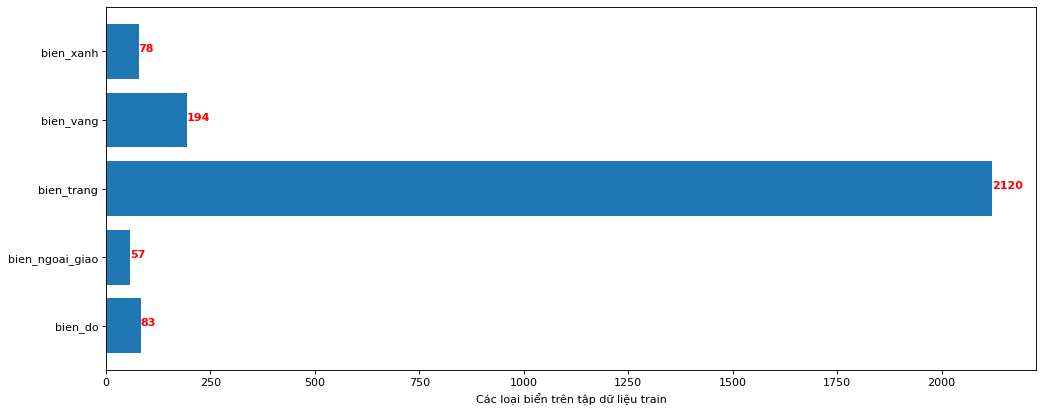

In [28]:
from matplotlib.pyplot import figure
import numpy as np
figure(figsize=(15, 6), dpi=80)
x = np.array(['bien_do','bien_ngoai_giao','bien_trang','bien_vang', 'bien_xanh'])
y = np.array([bien_do_train,bien_ngoai_giao_train,bien_trang_train,bien_vang_train,bien_xanh_train])
plt.barh(x,y)
for i, v in enumerate(y):
    plt.text(v, i, str(v), color='red', fontweight='bold')
plt.xlabel("Các loại biển trên tập dữ liệu train")
plt.show()

In [29]:
bien_do_test, bien_ngoai_giao_test, bien_trang_test, bien_vang_test, bien_xanh_test = thong_ke('/content/yolov5/BIENSOXE-5/test/labels') 

print(f'Bien do: {bien_do_test}')
print(f'Bien ngoai giao : {bien_ngoai_giao_test}')
print(f'Bien trang: {bien_trang_test}')
print(f'Bien vang: {bien_vang_test}')
print(f'Bien xanh: {bien_xanh_test}')

Nhãn :  224
Bien do: 12
Bien ngoai giao : 10
Bien trang: 307
Bien vang: 35
Bien xanh: 15


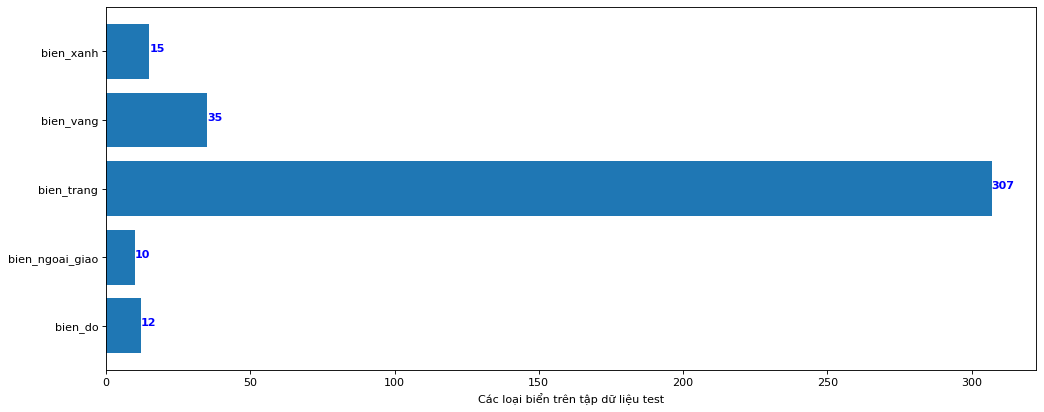

In [30]:
figure(figsize=(15, 6), dpi=80)
x = np.array(['bien_do','bien_ngoai_giao','bien_trang','bien_vang', 'bien_xanh'])
y = np.array([bien_do_test,bien_ngoai_giao_test,bien_trang_test,bien_vang_test,bien_xanh_test])
plt.barh(x,y)
for i, v in enumerate(y):
    plt.text(v, i, str(v), color='blue', fontweight='bold')
plt.xlabel("Các loại biển trên tập dữ liệu test")
plt.show()


In [31]:
bien_do_valid, bien_ngoai_giao_valid, bien_trang_valid, bien_vang_valid, bien_xanh_valid = thong_ke('/content/yolov5/BIENSOXE-5/valid/labels') 

print(f'Bien do: {bien_do_vaid}')
print(f'Bien ngoai giao : {bien_ngoai_giao_vaid}')
print(f'Bien trang: {bien_trang_valid}')
print(f'Bien vang: {bien_vang_valid}')
print(f'Bien xanh: {bien_xanh_valid}')

Nhãn :  414
Bien do: 23
Bien ngoai giao : 15
Bien trang: 617
Bien vang: 43
Bien xanh: 26


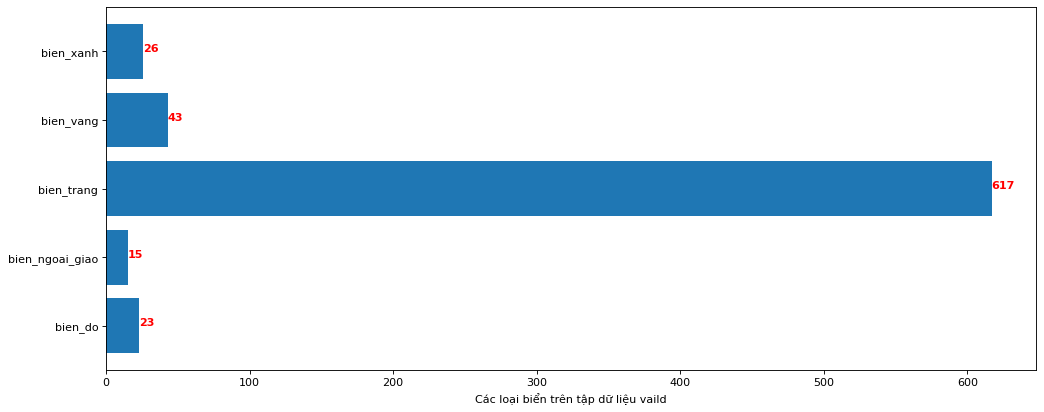

In [33]:
figure(figsize=(15, 6), dpi=80)
x = np.array(['bien_do', 'bien_ngoai_giao', 'bien_trang', 'bien_vang', 'bien_xanh'])
y = np.array([bien_do_valid, bien_ngoai_giao_valid, bien_trang_valid, bien_vang_valid, bien_xanh_valid])
plt.barh(x, y)
for i, v in enumerate(y):
    plt.text(v, i, str(v), color='red', fontweight='bold')
plt.xlabel("Các loại biển trên tập dữ liệu vaild")
plt.show()

In [38]:
print(f'Biển đỏ trong toàn bộ: {bien_do_test+bien_do_train+bien_do_vaid}')
print(f'Biển ngoại giao trong toàn bộ: {bien_ngoai_giao_test+bien_ngoai_giao_train+bien_ngoai_giao_valid}')
print(f'Biển trắng trong toàn bộ: {bien_trang_test+bien_trang_train+bien_trang_valid}')
print(f'Biển vàng trong toàn bộ: {bien_vang_test+bien_vang_train+bien_vang_valid}')
print(f'Biển xanh trong toàn bộ: {bien_xanh_test+bien_xanh_train+bien_xanh_valid}')

Biển đỏ trong toàn bộ: 118
Biển ngoại giao trong toàn bộ: 82
Biển trắng trong toàn bộ: 3044
Biển vàng trong toàn bộ: 272
Biển xanh trong toàn bộ: 119


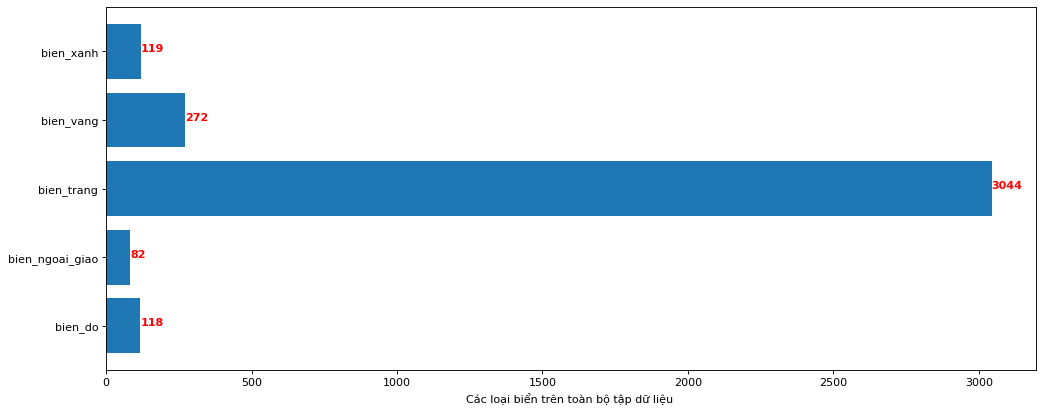

In [39]:
from matplotlib.pyplot import figure
import numpy as np
figure(figsize=(15, 6), dpi=80)
x = np.array(['bien_do','bien_ngoai_giao','bien_trang','bien_vang', 'bien_xanh'])
y = np.array([bien_do_train+bien_do_test+bien_do_valid,bien_ngoai_giao_train+bien_ngoai_giao_valid+bien_ngoai_giao_test,bien_trang_train+bien_trang_valid+bien_trang_test,bien_vang_train+bien_vang_test+bien_vang_valid,bien_xanh_train+bien_xanh_test+bien_xanh_valid])
plt.barh(x,y)
for i, v in enumerate(y):
    plt.text(v, i, str(v), color='red', fontweight='bold')
plt.xlabel("Các loại biển trên toàn bộ tập dữ liệu ")
plt.show()

In [ ]:
!python train.py --img 640 --batch 16 --epochs 5 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/BIENSOXE-5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015,

In [ ]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/Thanhalone0106/CS114.N11.KHCL

Cloning into 'CS114.N11.KHCL'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), 5.86 KiB | 750.00 KiB/s, done.


In [ ]:
!python /content/yolov5/CS114.N11.KHCL/read_text.py.txt

    Frame  ... Height
0       1  ...    NaN
1       2  ...     24
2       3  ...     24
3       4  ...     24
4       5  ...     24
..    ...  ...    ...
346   339  ...    NaN
347   340  ...    NaN
348   341  ...    NaN
349   342  ...    NaN
350   343  ...    NaN

[351 rows x 5 columns]


In [ ]:
!python /content/yolov5/CS114.N11.KHCL/main.py.txt --input_vid_path /content/video_1.mp4

FPS: 30	 1032x504
Done


In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source /content/images.jpg --save-txt --save-conf  --exist-ok

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/images.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/images.jpg: 288x416 1 Bien_ngoaigiao, 1 Bien_xanh, 13.9ms
Speed: 0.4ms pre-process, 13.9ms inference, 2.0ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp
1 labels saved to runs/detect/exp/labels


In [ ]:
import csv

# Mở tệp txt chứa kết quả phát hiện
with open('/content/yolov5/runs/detect/exp/labels/images.txt', 'r') as f:
    lines = f.readlines()

# Tạo tệp CSV mới để lưu trữ kết quả
with open('detect_results.csv', 'w', newline='') as f:
    writer = csv.writer(f)

    # Viết tiêu đề cho các cột trong file CSV
    writer.writerow(['x', 'y', 'w', 'h'])

    # Duyệt qua từng dòng trong tệp txt và ghi thông tin tọa độ và kích thước vào file CSV
    for line in lines:
        # Chuyển đổi dòng văn bản thành danh sách các giá trị số thực
        values = [float(x) for x in line.split()[1:]]

        # Ghi thông tin tọa độ và kích thước của bounding box vào file CSV
        writer.writerow(values[:4])

In [ ]:
import cv2

img = cv2.imread('image.jpg')

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source /content/drive/MyDrive/video_xe/VID20230222172933.mp4 --save-txt --save-conf  --exist-ok

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/video_xe/VID20230222172933.mp4, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/1304) /content/drive/.shortcut-targets-by-id/1z9zt8Rf0MhyrtEOz_24LulLzzNzarpjO/video_xe/VID20230222172933.mp4: 256x416 1 Bien_trang, 12.9ms
video 1/1 (2/1304) /content/drive/.shortcut-targets-by-id/1z9zt8Rf0MhyrtEOz_24LulLzzNzarpjO/video_xe/VID20230222172933.mp4: 256x416 1 Bien_trang, 12.1ms
video 1/1 

In [ ]:
import cv2
import os

# Đường dẫn đến tập tin txt chứa thông tin về vị trí và kích thước của đối tượng
txt_path = "/content/yolov5/runs/detect/exp/labels/images.txt"

# Đường dẫn đến ảnh gốc
img_path = "/content/images.jpg"

# Đọc tập tin txt để lấy thông tin về vị trí và kích thước của đối tượng
with open(txt_path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        # Tách thông tin về tọa độ và kích thước của đối tượng
        x, y, w, h = line.strip().split(' ')

        # Đọc ảnh gốc
        img = cv2.imread(img_path)

        # Tạo một mask để ẩn đối tượng bằng màu trắng
        mask = np.zeros(img.shape[:2], dtype=np.uint8)
        mask[int(y):int(y)+int(h), int(x):int(x)+int(w)] = 255

        # Áp dụng Gaussian Blur để làm mờ đối tượng trong ảnh
        blurred = cv2.GaussianBlur(img, (51,51), 0, mask=mask)

        # Lưu ảnh đã xử lý
        output_path = os.path.splitext(img_path)[0] + '_blurred.jpg'
        cv2.imwrite(output_path, blurred)

ValueError: ignored

In [ ]:
%cat *.txt > combined.txt

In [ ]:
import cv2

# Đọc tệp "combined.txt" và lưu các thông tin vị trí của đối tượng vào một danh sách
object_positions = []
with open("combined.txt", "r") as f:
    lines = f.readlines()
    for line in lines:
        object_positions.append(list(map(int, line.strip().split())))

# Sử dụng OpenCV để đọc video đầu vào và khởi tạo video đầu ra
input_video = cv2.VideoCapture("input_video.mp4")
output_video = cv2.VideoWriter("output_video.avi", cv2.VideoWriter_fourcc(*"MJPG"), 
                               int(input_video.get(cv2.CAP_PROP_FPS)), 
                               (int(input_video.get(cv2.CAP_PROP_FRAME_WIDTH)), 
                                int(input_video.get(cv2.CAP_PROP_FRAME_HEIGHT))))

# Duyệt qua các khung hình trong video đầu vào
while True:
    ret, frame = input_video.read()
    if not ret:
        break
    
    # Với mỗi khung hình, duyệt qua danh sách các vị trí của đối tượng
    for position in object_positions:
        x, y, w, h = position
        
        # Vẽ hình chữ nhật lên khung hình để che phủ đối tượng
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 0), -1)
        
        # Làm mờ vùng hình chữ nhật được vẽ lên khung hình
        blurred_roi = frame[y:y+h, x:x+w]
        blurred_roi = cv2.GaussianBlur(blurred_roi, (25, 25), 0)
        frame[y:y+h, x:x+w] = blurred_roi
        
    # Ghi các khung hình đã xử lý vào video đầu ra
    output_video.write(frame)

# Giải phóng tài nguyên
input_video.release()
output_video.release()
cv2.destroyAllWindows()


In [ ]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'custom', path_or_model='yolov5s_voc_best.pt')
model = model.autoshape()  # for PIL/cv2/np inputs and NMS

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master


TypeError: ignored

In [ ]:
!ls /content/yolov5/runs/train/yolov5s_results3

ls: cannot access '/content/yolov5/runs/train/yolov5s_results3': No such file or directory


In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/yolov5/BIENSOXE-5/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/224 /content/yolov5/BIENSOXE-5/test/images/0000_02187_b_jpg.rf.7c6de465e71d9665e4e3217c244e55bb.jpg: 416x416 1 Bien_trang, 8.2ms
image 2/224 /content/yolov5/BIENSOXE-5/test/images/0003_07398_b_jpg.rf.bc365d4de20245204074574a8353ccdc.jpg: 416x416 1 Bien_trang, 10.0ms
image 3/224 /content/yolov5/BIENSOXE-5/test/images/00

In [ ]:

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
!ls /content/yolov5/runs/train/exp

events.out.tfevents.1677642237.45b7911a3a49.3084.0  results.csv
hyp.yaml					    train_batch0.jpg
labels_correlogram.jpg				    train_batch1.jpg
labels.jpg					    train_batch2.jpg
opt.yaml					    weights


In [ ]:
%cd {HOME}
Image(filename=f'/content/yolov5/runs/train/exp/confusion_matrix.png', width=640)

[Errno 2] No such file or directory: '{HOME}'
/content/yolov5


FileNotFoundError: ignored

In [ ]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/exp/results.png', width=1000)  # view results.png

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/exp/train_batch0.jpg', width=900)

In [ ]:
# trained weights are saved by default in our weights folder
%ls runs/

In [ ]:
%ls /content/yolov5/runs/train/exp/weights

In [ ]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
%cd /content/yolov5/
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 416 --conf 0.4 --source /content/datasets/BIENSOXE-5/test/images

In [ ]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov5", model_path=f"/content/yolov5/runs/train/yolov5s_results/")
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5s_results2/results.png', width=1000)  # view results.png

In [ ]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results2/test_batch0_labels.jpg', width=900)